In [3]:
from data_tools import *

In [4]:
img_dir='/home/jovyan/Planet/planet_flat'

In [5]:
tif_fns=fn_list(img_dir,"*_refl.tif")

/home/jovyan/Planet/planet_flat/703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/794418_1060719_2017-09-28_0f35_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2574848_1060718_2019-08-04_0f4e_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2574618_1060618_2019-08-04_0f3d_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2548533_1060719_2019-07-25_0f15_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2575093_1060719_2019-08-04_1039_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644800_1060619_2017-07-25_100b_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644800_1060718_2017-07-25_100b_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2631559_1060618_2019-08-27_1032_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2575165_1060719_2019-08-04_105c_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/795543_1060618_2

In [6]:
#tif_fns[0]='/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif'
#t='/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic_refl.tif'

In [7]:
#import numpy as np

#img=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
#img.shape

#blue=img[:,:,0]
#green=img[:,:,1]
#red=img[:,:,2]
#nir=img[:,:,3]

In [8]:
# Full image array
blue_full=np.ma.masked_equal(read_raster(tif_fns[2],band=1)[0],0).astype(float)
green_full=np.ma.masked_equal(read_raster(tif_fns[2],band=2)[0],0).astype(float)
#red_full=read_raster(tif_fns[2],band=3)[0]
#nir_full=read_raster(tif_fns[2],band=4)[0]
red_full=np.ma.masked_equal(read_raster(tif_fns[2],band=3)[0],0).astype(float)
nir_full=np.ma.masked_equal(read_raster(tif_fns[2],band=4)[0],0).astype(float)

In [9]:
tif_fns[2]

'/home/jovyan/Planet/planet_flat/2412728_1060619_2019-06-02_0e26_BGRN_Analytic_refl.tif'

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


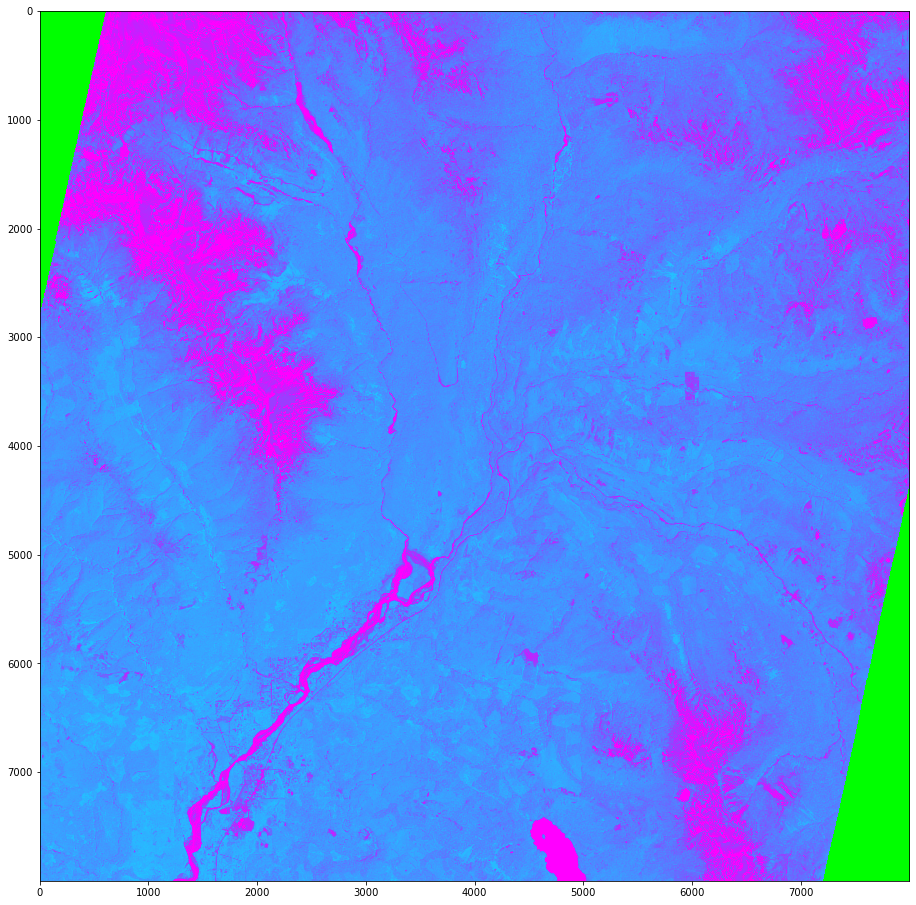

In [27]:
red_nir_f=red_full/nir_full
ndvi_f=ndvi = np.divide((nir_full-red_full),(nir_full+red_full))
np.seterr(divide='ignore', invalid='ignore')
rgb_img_f=np.dstack((red_nir_f, ndvi_f, blue_full))
plt.figure(figsize=(16,16))
plt.imshow(rgb_img_f)

In [28]:
print(ndvi_f)

[[-- -- -- ... 0.2939936775553214 0.30005367686527107 0.3298484056455829]
 [-- -- -- ... 0.30832476875642345 0.31887890005288205 0.3233724653148346]
 [-- -- -- ... 0.3250373320059731 0.3357664233576642 0.3308550185873606]
 ...
 [0.6868528396611233 0.6854489164086688 0.6853168469860896 ... -- -- --]
 [0.6858475894245724 0.6875192604006163 0.6867019620056057 ... -- -- --]
 [0.6821779044001266 0.6892059553349876 0.6891679748822606 ... -- -- --]]


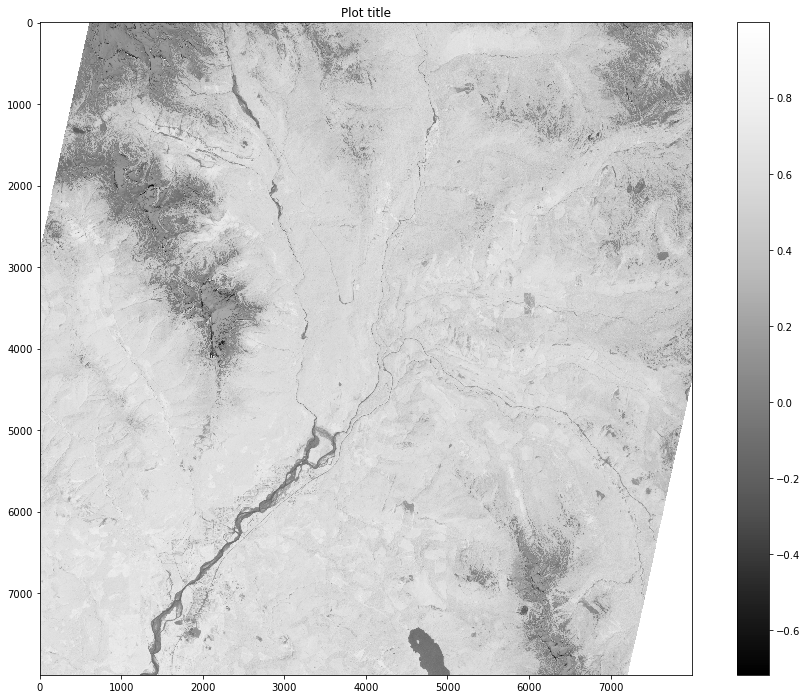

In [29]:
plot_me(ndvi_f)

In [30]:
(blue_full/10000)[blue_full/10000<0.5] = -9999

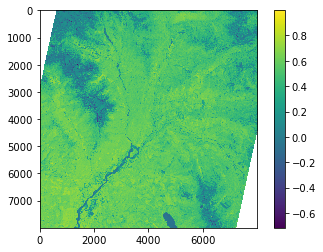

In [31]:
plt.imshow(ndvi_f)
plt.colorbar()


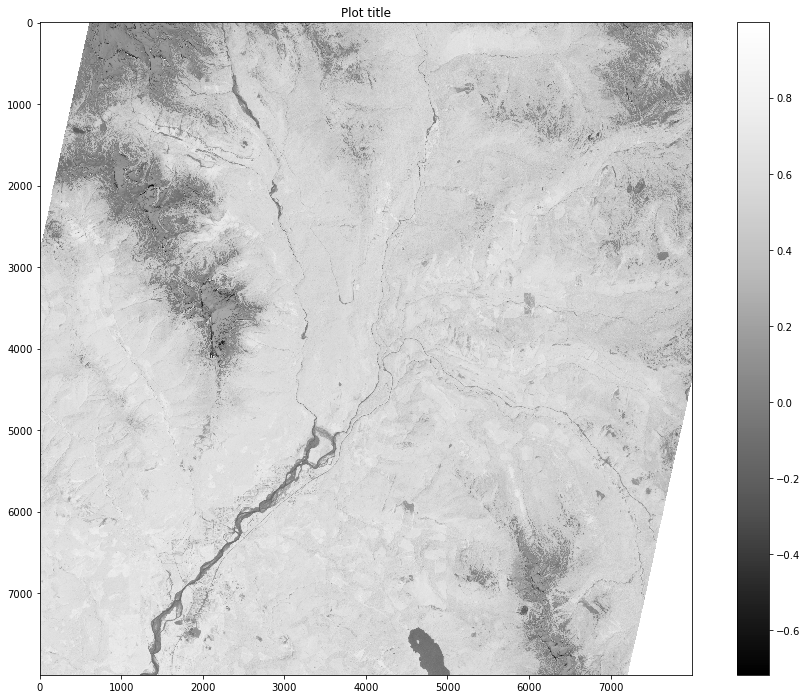

In [32]:
plot_me(ndvi_f)

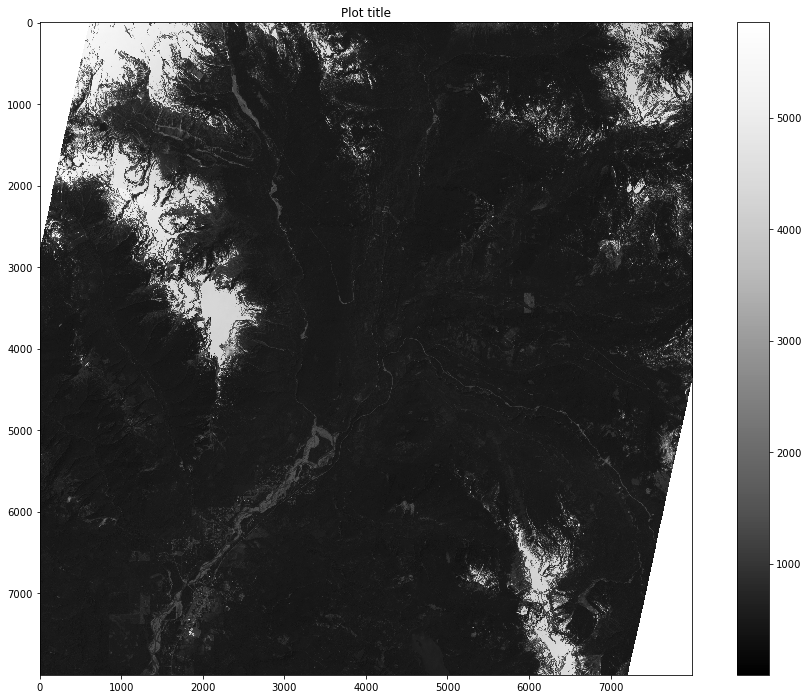

In [33]:
plot_me(red_full)

In [34]:
red_full[8000-1,4990]

654.0

In [35]:
_/10000

0.0654

In [36]:
nir_full[8000-1,4990]

608.0

In [37]:
ndvi_f[8000-1,4990]

-0.03645007923930269

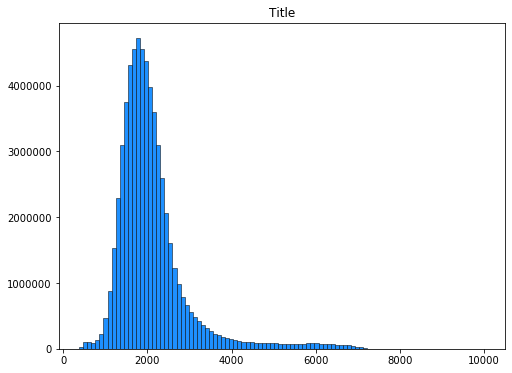

In [38]:
histo_me(nir_full)

In [39]:
# subset 64x64
#subset=first[:64, :64]

In [40]:
#plot_me(subset)

In [41]:
tell_me_more(np.ma.getdata(nir_full[:64,:64]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [42]:
tif_fns[0]

'/home/jovyan/Planet/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic_refl.tif'

In [43]:
#2412728_1060619_2019-06-02_0e26_BGRN_Analytic_refl.tif

SyntaxError: invalid token (<ipython-input-43-38ed742ae132>, line 1)

In [ ]:
blue=read_raster(tif_fns[2],band=1)[0]
green=read_raster(tif_fns[2],band=2)[0]
red=read_raster(tif_fns[2],band=3)[0]
nir=read_raster(tif_fns[2],band=4)[0]


In [44]:
multiplier=16
m=multiplier*64
blue=read_raster(tif_fns[2],band=1)[0][:64,1000:1064].astype(float)
green=read_raster(tif_fns[2],band=2)[0][:64,1000:1064].astype(float)
red=read_raster(tif_fns[2],band=3)[0][:64,1000:1064].astype(float)
nir=read_raster(tif_fns[2],band=4)[0][:64,1000:1064].astype(float)


In [45]:
red.shape

(64, 64)

In [46]:
rgb_img=np.dstack((red/10000, green/10000, blue/10000))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


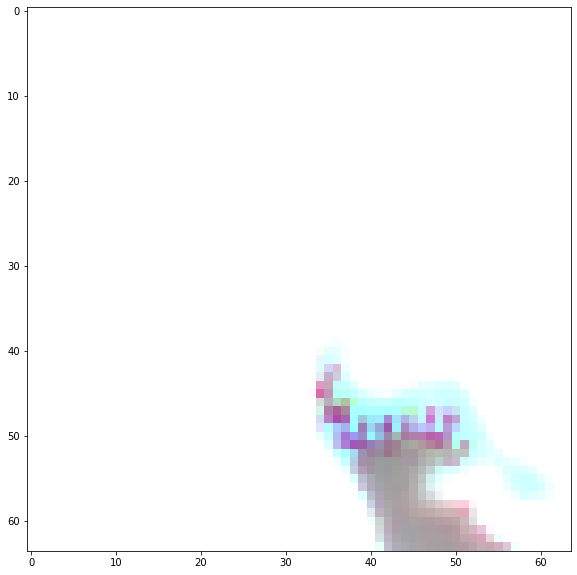

In [47]:
red_nir=red/nir
ndvi=(nir-red)/(nir+red)
rgb_img1=np.dstack((nir/3000,red/3000,green/3000))
plt.figure(figsize=(10,10))
plt.imshow(rgb_img1,vmin=0,vmax=0.03)

In [48]:
#plt.figure(figsize=(10,10))
#plt.imshow(rgb_img)
#plt.colorbar(shrink=0.6)

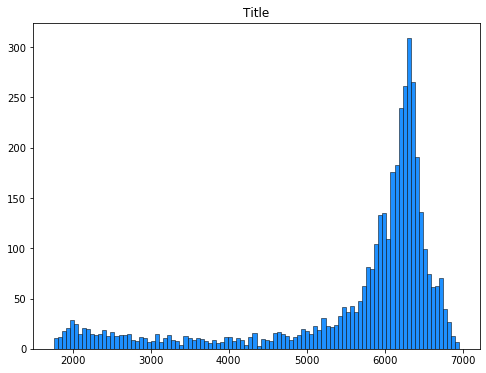

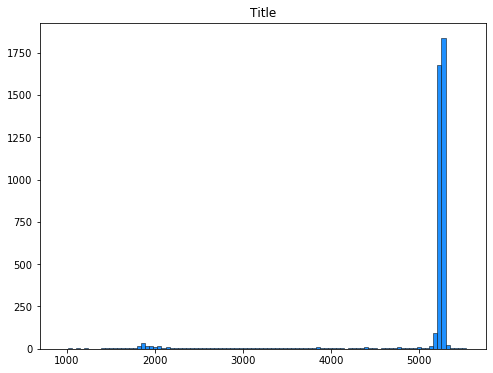

In [49]:
histo_me(nir)
histo_me(red)

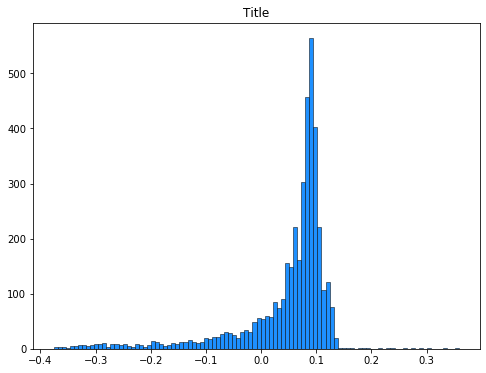

In [51]:
histo_me(ndvi)

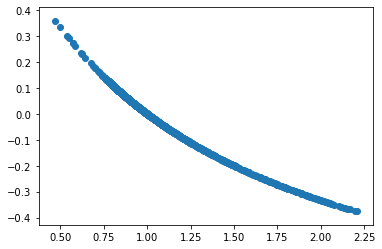

In [52]:
plt.scatter(red_nir, ndvi)

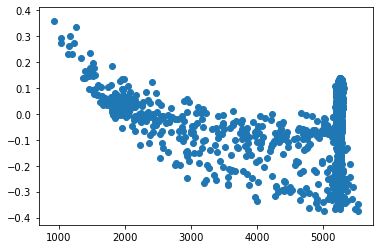

In [53]:
plt.scatter(red, ndvi)

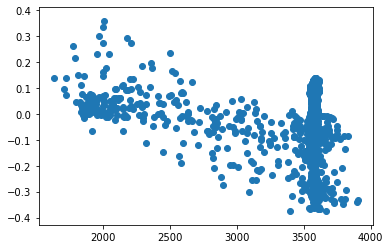

In [55]:
plt.scatter(green, ndvi)

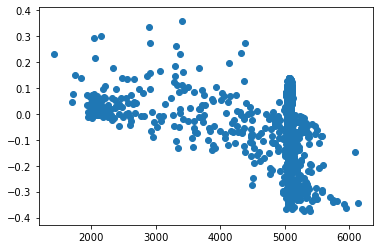

In [56]:
plt.scatter(blue, ndvi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


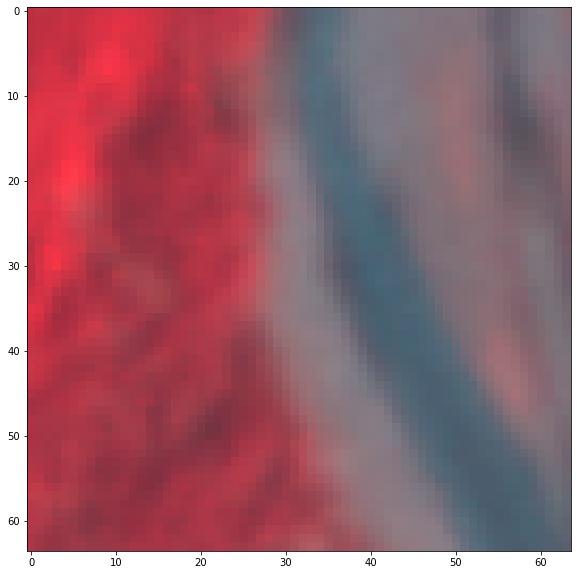

In [69]:
blue=read_raster(tif_fns[2],band=1)[0][5000:5064,3300:3364].astype(float)
green=read_raster(tif_fns[2],band=2)[0][5000:5064,3300:3364].astype(float)
red=read_raster(tif_fns[2],band=3)[0][5000:5064,3300:3364].astype(float)
nir=read_raster(tif_fns[2],band=4)[0][5000:5064,3300:3364].astype(float)
rgb_img1=np.dstack((nir/3000,red/3000,green/3000))
plt.figure(figsize=(10,10))
plt.imshow(rgb_img1,vmin=0,vmax=0.03)


In [71]:
red_nir=red/nir
ndvi=(nir-red)/(nir+red)

In [76]:
#water
ndvi[50,50]

-0.12397540983606557

In [77]:
#soil
ndvi[60,40]


0.12007874015748031

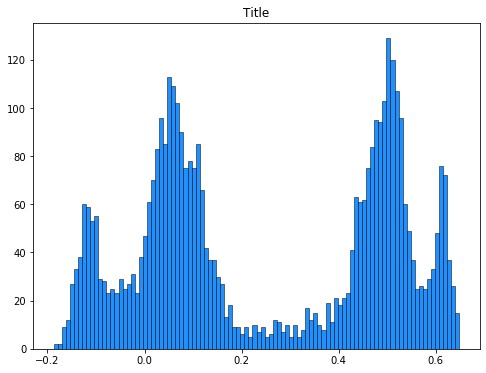

In [72]:
histo_me(ndvi)


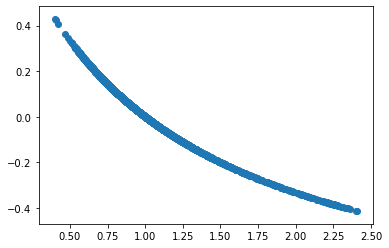

In [67]:
plt.scatter(red_nir, ndvi)

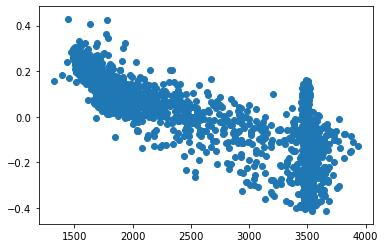

In [68]:
plt.scatter(green, ndvi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


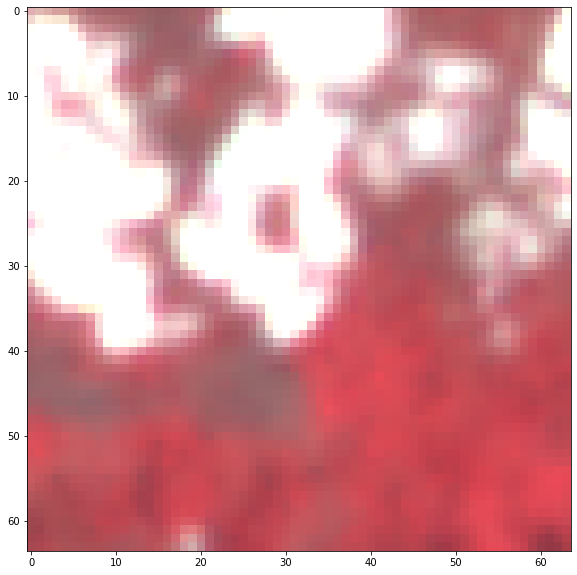

In [95]:
blue=read_raster(tif_fns[2],band=1)[0][2320:2384,2000:2064].astype(float)
green=read_raster(tif_fns[2],band=2)[0][2320:2384,2000:2064].astype(float)
red=read_raster(tif_fns[2],band=3)[0][2320:2384,2000:2064].astype(float)
nir=read_raster(tif_fns[2],band=4)[0][2320:2384,2000:2064].astype(float)
rgb_img1=np.dstack((nir/3000,red/3000,green/3000))
plt.figure(figsize=(10,10))
plt.imshow(rgb_img1,vmin=0,vmax=0.03)

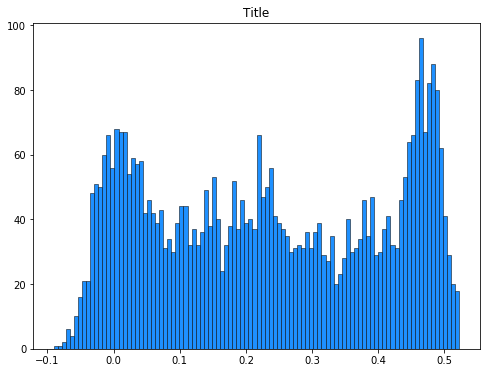

In [96]:
ndvi=(nir-red)/(nir+red)
histo_me(ndvi)

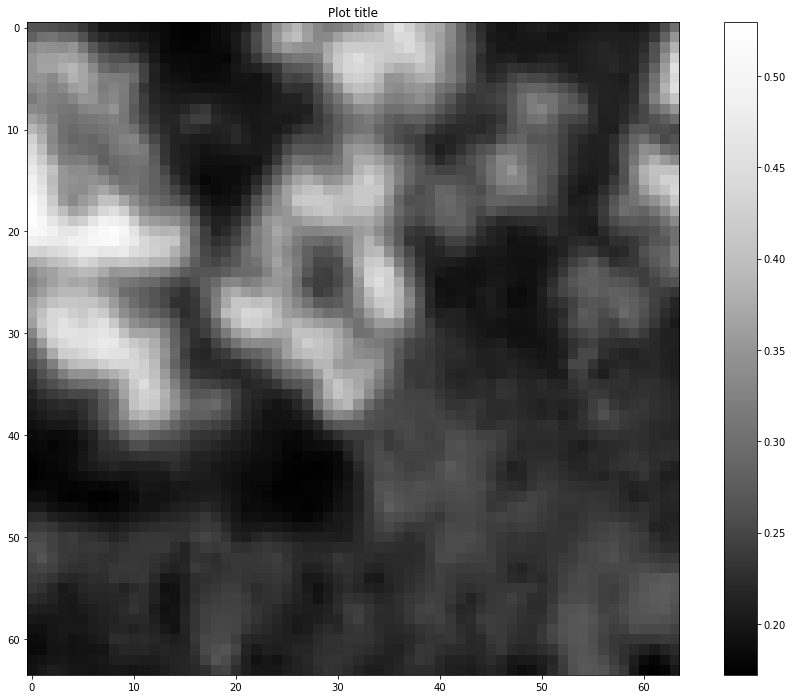

In [109]:
plot_me(nir/10000)

In [112]:
nir[20,8]/10000

0.5214

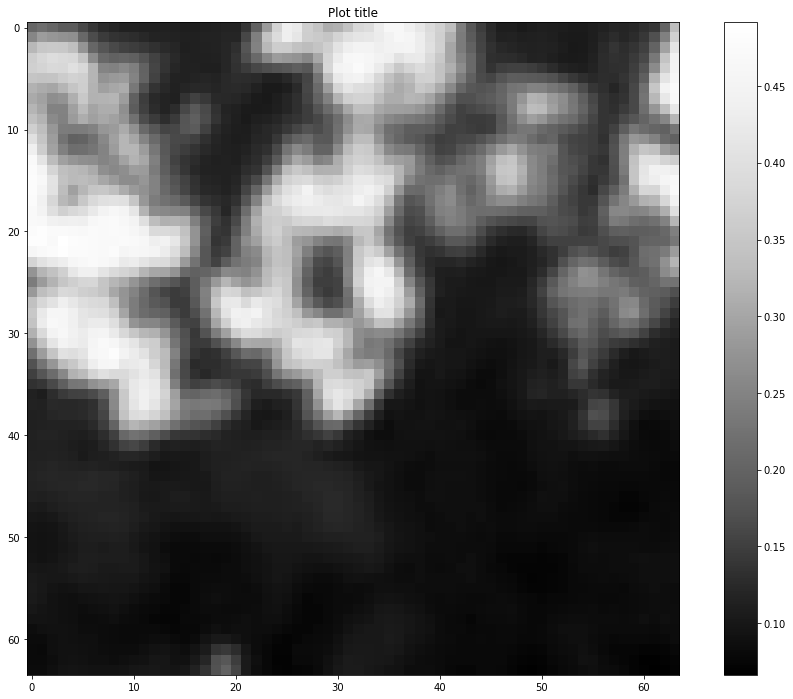

In [108]:
plot_me(red/10000)

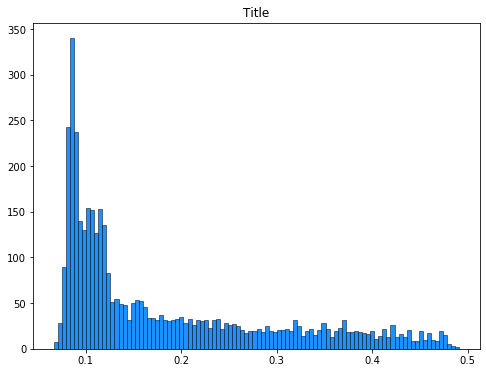

In [113]:
histo_me(red/10000)

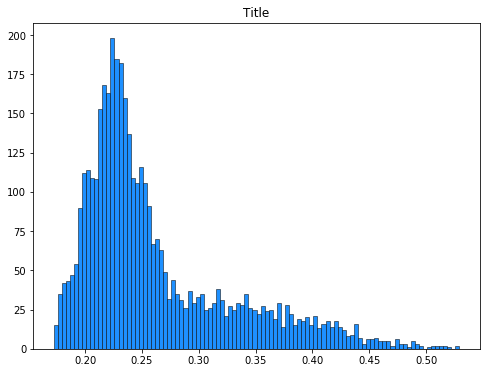

In [114]:
histo_me(nir/10000)

In [118]:
plot_me(ndvi(ndvi<0.08))

TypeError: 'numpy.ndarray' object is not callable

In [119]:
ndvi<0.08

array([[False, False, False, ..., False, False,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [120]:
n=ndvi<0.08

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

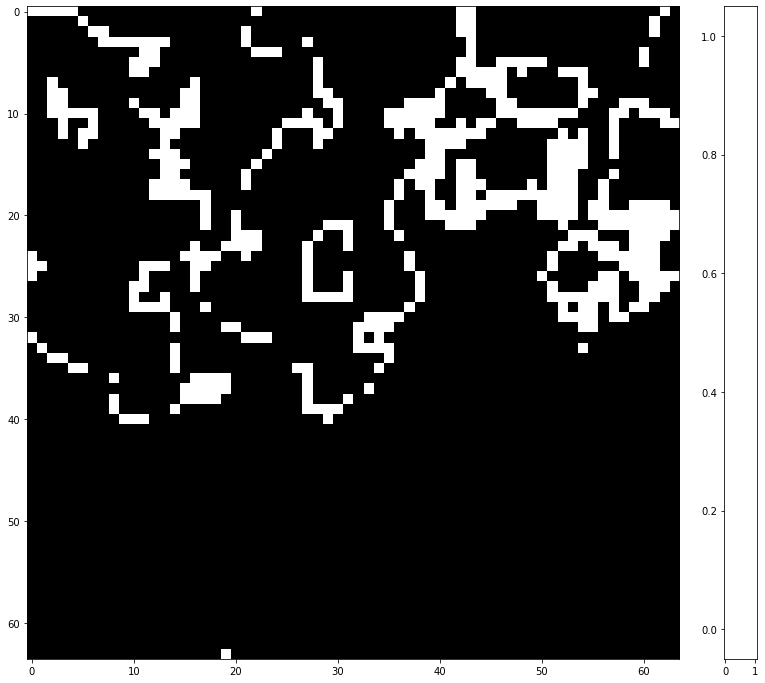

In [123]:
plot_me((ndvi>0.08)&(ndvi<0.16))